In [1]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
from scipy.linalg import circulant

In [2]:
N=64
c=0.6
n=1000
#For questions a,b,c the noise variance sigma^2=1
sigma1=1
#For question d the noise variance is sigma^2=5
sigma5=5

def createPhi(N,c):
  #M,L follow a Gaussian distribution which satisfies the second-order statistics of the class of a parameter c = 0.6.
  #From the third dry question we get that E(M^2)=c, E(L^2)=(N/2)*(1-c), E(L)=0, E(M)=0
  L=np.random.normal(scale=np.sqrt((N/2)*(1-c)))
  M=np.random.normal(scale=np.sqrt(c))
  #K is a uniform random variable over the numbers {1,...,N/2}
  K=np.random.randint(low=1,high=N//2+1)
  phi=np.ones((N))
  phi*=M
  #we count indices from zero so we get that the k'th element in the question is k-1 element in the vector here
  phi[K-1]+=L
  phi[K+N//2-1]+=L
  return phi


def createRealizations(n,N,c):
  reals = []
  for i in range(n):
    reals += [createPhi(N,c)]
  reals=np.array(reals)
  return reals

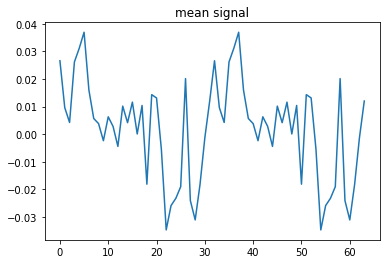

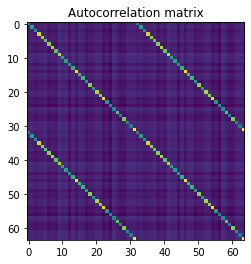

In [3]:
def createMeanSampleAndAutoCorr(n):
  reals=createRealizations(n,N,c)
  autocor_matrix=(reals.T@reals)/n
  mean=np.mean(reals,axis=0)
  return reals, mean, autocor_matrix

# Question a, plotting the empirical mean of the class, and show the empirically estimated autocorrelation matrix
reals, mean, autocor_matrix = createMeanSampleAndAutoCorr(n)
_ = plt.plot(mean)
_ = plt.title("mean signal")
_ = plt.show()
_ = plt.imshow(autocor_matrix)
_ = plt.title("Autocorrelation matrix")

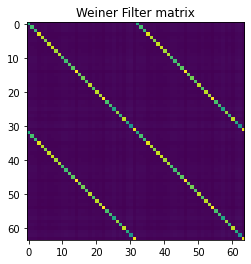

In [4]:
def createWienerFilter(autocor_matrix,sigma):
  wiener=autocor_matrix@np.linalg.inv(autocor_matrix+sigma*np.eye(N))
  return wiener

def createWienerWithH(autocor_matrix,sigma,h_matrix):
  wiener_with_h=(autocor_matrix@h_matrix.T)@np.linalg.inv((h_matrix@autocor_matrix@h_matrix.T)+sigma*np.eye(N))
  return wiener_with_h

# Question b, show the filter matrix, consider sigma=1
_ = plt.imshow(createWienerFilter(autocor_matrix,sigma1))
_ = plt.title("Weiner Filter matrix")

In [5]:
def createRecon(reals, autocor_matrix, sigma):
  wiener = createWienerFilter(autocor_matrix, sigma)
  noise_matrix=np.random.normal(size=reals.shape, scale=np.sqrt(sigma))
  noisy_data=reals+noise_matrix
  reconstructed_data=(wiener@noisy_data.T).T
  return noisy_data,reconstructed_data

In [6]:
def createReconByFilter(reals, wiener_filter, H):
  noise_matrix=np.random.normal(size=reals.shape)
  filtered_noisy_data=reals@H.T+noise_matrix
  reconstructed_data=(wiener_filter@filtered_noisy_data.T).T
  return filtered_noisy_data,reconstructed_data

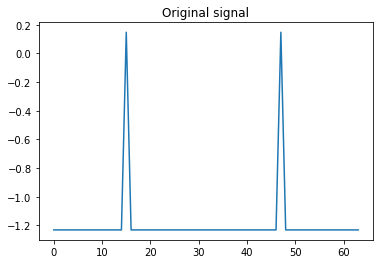

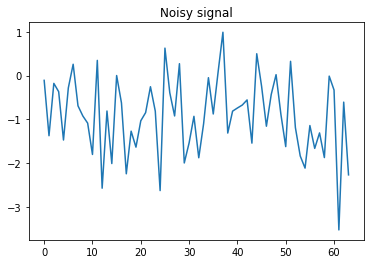

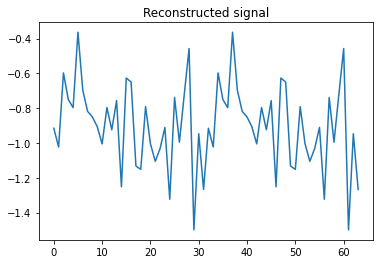

the mse for 10 realizations is: 0.17733068911604621


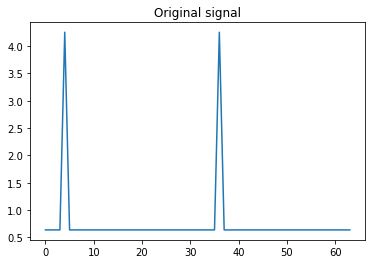

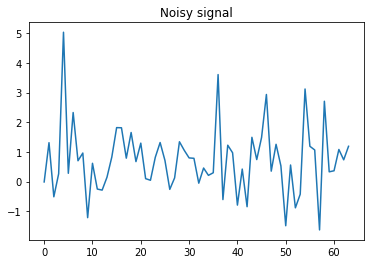

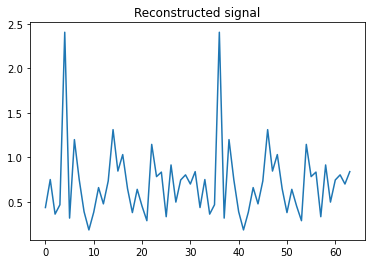

the mse for 100 realizations is: 0.1823494667048793


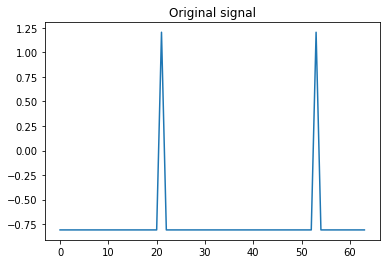

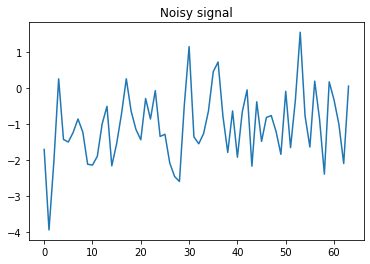

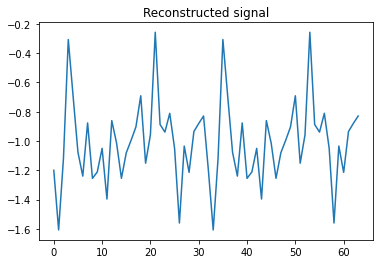

the mse for 500 realizations is: 0.17816515735442
Average MSE 0.21876572537066613


In [7]:
def plotRecons(reals, noisy_data, reconstructed_data):
  signals=[10,100,500]
  for i in signals:
    original_signal=reals[i,:]
    noisy_signal=noisy_data[i,:]
    recon_signal=reconstructed_data[i,:]
    _ = plt.plot(original_signal)
    plt.title("Original signal")
    _ = plt.show()
    _ = plt.plot(noisy_signal)
    plt.title("Noisy signal")
    _ = plt.show()
    _ = plt.plot(recon_signal)
    plt.title("Reconstructed signal")
    _ = plt.show()
    mse=np.mean((recon_signal-original_signal)**2)
    print("the mse for "+str(i)+" realizations is: " +str(mse))

# Question b
noisy_data,reconstructed_data = createRecon(reals,autocor_matrix,sigma1)
plotRecons(reals, noisy_data, reconstructed_data)
avg_mse=np.mean((reconstructed_data-reals)**2)
print("Average MSE "+str(avg_mse))

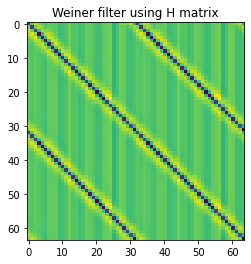

In [8]:
# Question c, using the H matrix given in the dry part

def createHMatrix(autocor_matrix):
  circulant_col = np.zeros(N)
  circulant_col[0] = -5/2
  circulant_col[1] = 4/3
  circulant_col[2] = -1/12
  circulant_col[-1] = 4/3
  circulant_col[-2] = -1/12

  h_matrix = circulant(circulant_col)
  return h_matrix

h_matrix = createHMatrix(autocor_matrix)
wiener_with_h= createWienerWithH(autocor_matrix, sigma1, h_matrix)
_ = plt.imshow(wiener_with_h)
_ = plt.title("Weiner filter using H matrix")

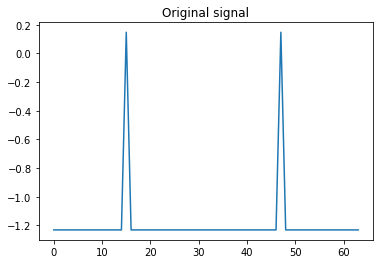

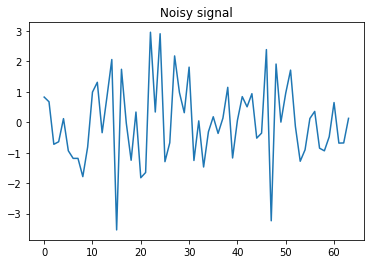

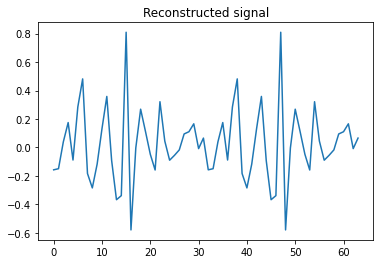

the mse for 10 realizations is: 1.5255235237071647


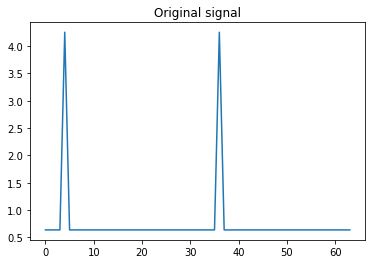

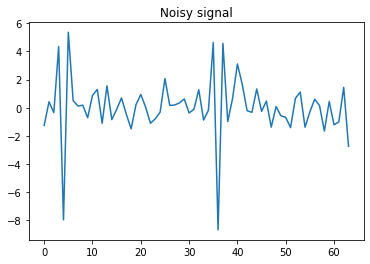

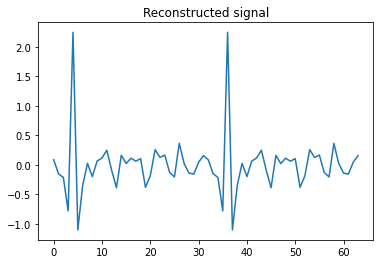

the mse for 100 realizations is: 0.6989814253920233


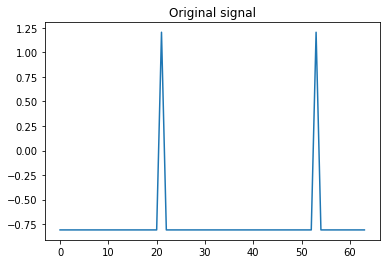

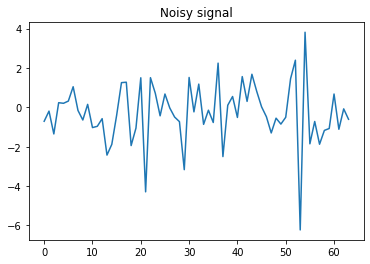

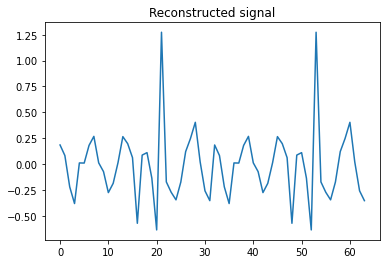

the mse for 500 realizations is: 0.6079841311159725


In [9]:
plotRecons(reals,createReconByFilter(reals,wiener_with_h,h_matrix)[0],createReconByFilter(reals,wiener_with_h,h_matrix)[1])

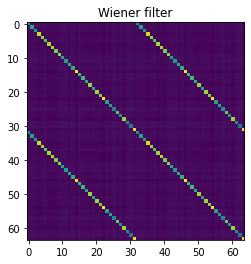

In [10]:
# Question d, repeating the previous questions but now the noise variance is 5

wiener_sigma5=createWienerFilter(autocor_matrix,sigma5)
plt.imshow(wiener_sigma5)
_ = plt.title("Wiener filter")

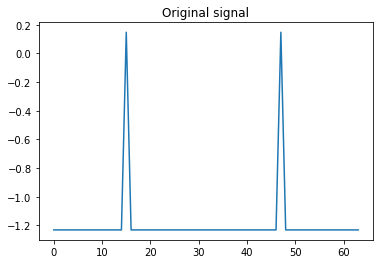

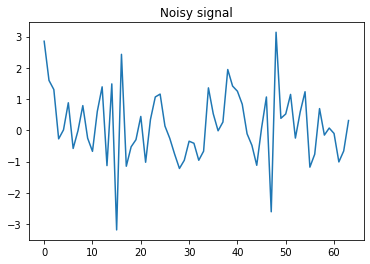

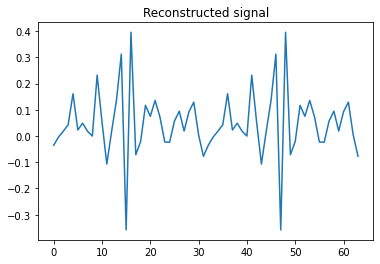

the mse for 10 realizations is: 1.6381606110249591


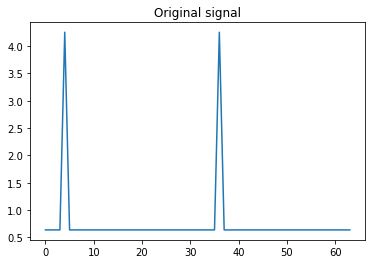

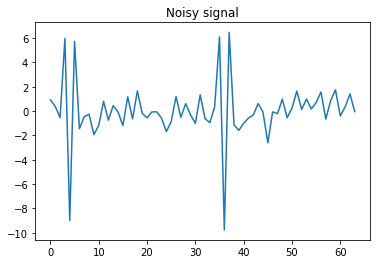

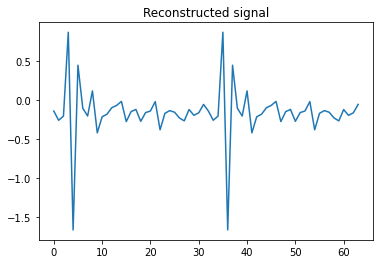

the mse for 100 realizations is: 1.695328431860272


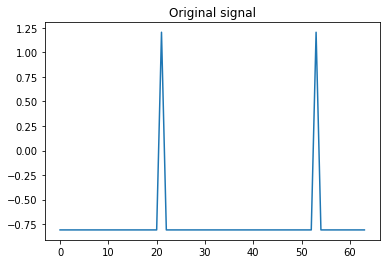

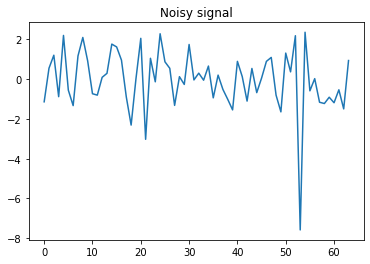

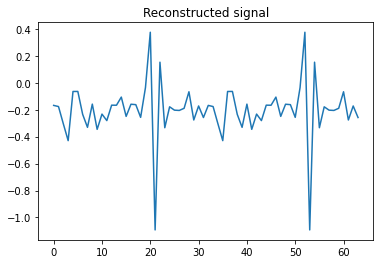

the mse for 500 realizations is: 0.5760357046081013


In [11]:
plotRecons(reals,createReconByFilter(reals,wiener_sigma5,h_matrix)[0],createReconByFilter(reals,wiener_sigma5,h_matrix)[1])

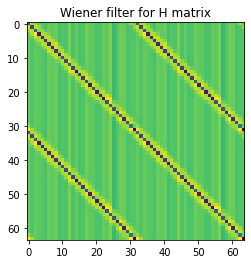

In [12]:
wiener_H_sigma5=createWienerWithH(autocor_matrix, sigma5, h_matrix)
plt.imshow(wiener_H_sigma5)
_ = plt.title("Wiener filter for H matrix")

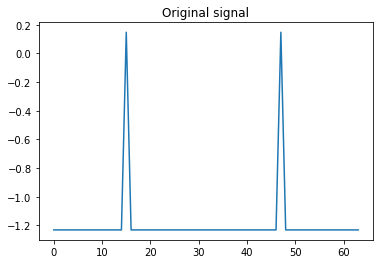

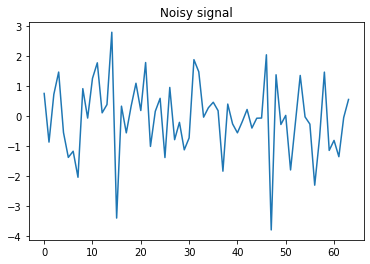

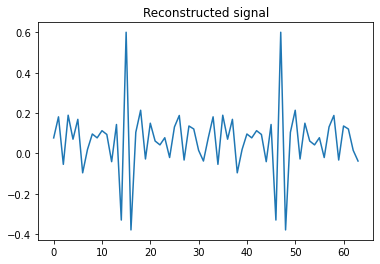

the mse for 10 realizations is: 1.6076549365849035


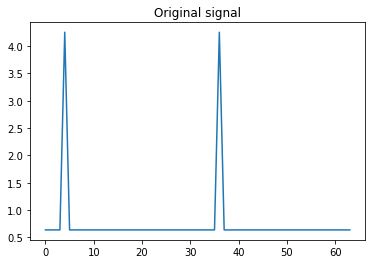

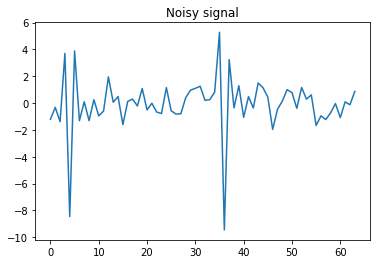

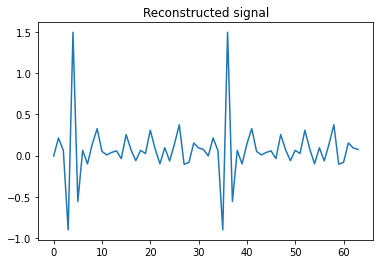

the mse for 100 realizations is: 0.6571979400026522


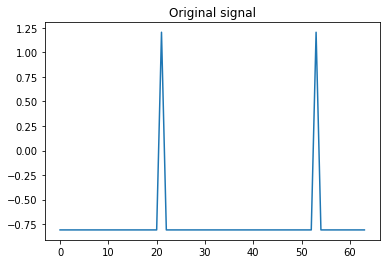

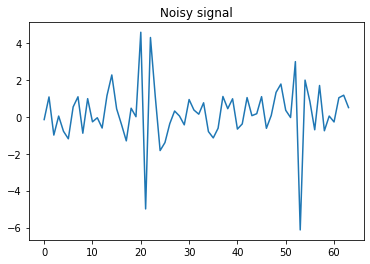

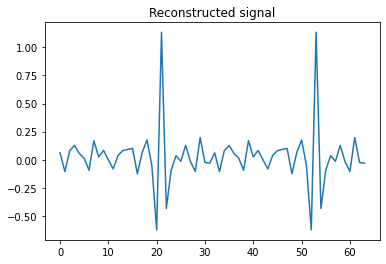

the mse for 500 realizations is: 0.6472881385570854


In [13]:
plotRecons(reals, createReconByFilter(reals,wiener_H_sigma5,h_matrix)[0], createReconByFilter(reals,wiener_H_sigma5,h_matrix)[1])

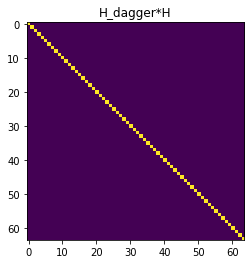

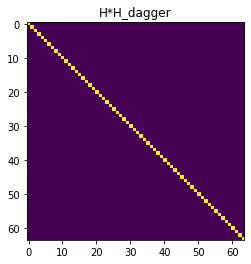

In [14]:
# Question e

h_inv = np.linalg.pinv(h_matrix)
_ = plt.imshow(h_inv@h_matrix)
_ = plt.title("H_dagger*H")
_ = plt.show()
_ = plt.imshow(h_matrix@h_inv)
_ = plt.title("H*H_dagger")
_ = plt.show()

In [15]:
phi1 = np.ones(N)*64
phi2 = np.zeros(N)
hinv_p1 = h_inv@phi1
hinv_p2 = h_inv@phi2
print(np.sqrt((phi1-phi2)@(phi1-phi2)))
print(np.sqrt((hinv_p1-hinv_p2)@(hinv_p1-hinv_p2)))

512.0
7.0966901994179025e-09


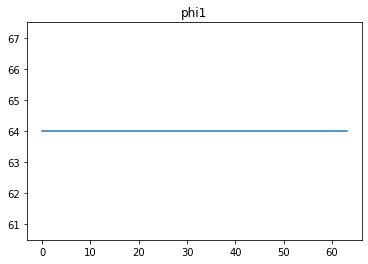

In [16]:
_ = plt.plot(phi1) 
_ = plt.title("phi1")
_ = plt.show()

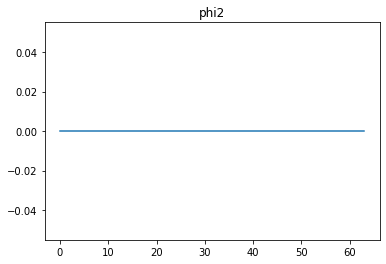

In [17]:
_ = plt.plot(phi2) 
_ = plt.title("phi2")
_ = plt.show()

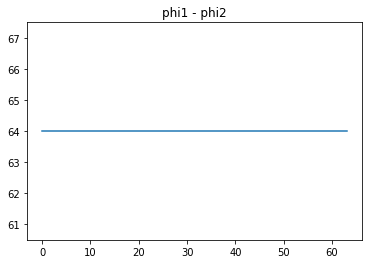

In [18]:
_ = plt.plot(phi1 - phi2) 
_ = plt.title("phi1 - phi2")
_ = plt.show()

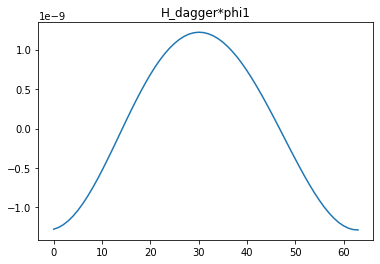

In [19]:
_ = plt.plot(hinv_p1) 
_ = plt.title("H_dagger*phi1")
_ = plt.show()

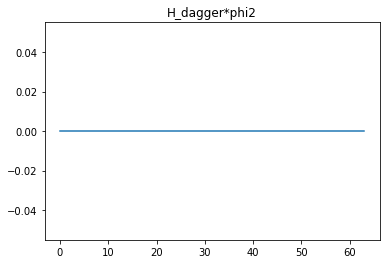

In [20]:
_ = plt.plot(hinv_p2) 
_ = plt.title("H_dagger*phi2")
_ = plt.show()

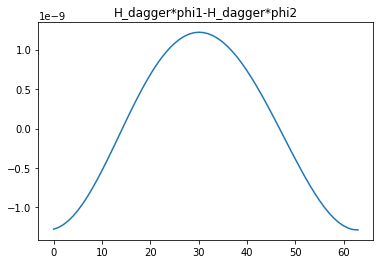

In [21]:
_ = plt.plot(hinv_p1 - hinv_p2) 
_ = plt.title("H_dagger*phi1-H_dagger*phi2")
_ = plt.show()